### K-Nearest Neighbor Algorithm


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [4]:
iris= load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X,y = iris.data,iris.target
feature_names = iris.feature_names

In [9]:
data = pd.DataFrame(X,columns=feature_names)
data['target'] = y
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_test

array([1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2])

In [26]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [30]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

acc = accuracy_score(y_test,y_pred)
acc

1.0

In [31]:
import matplotlib.pyplot as plt

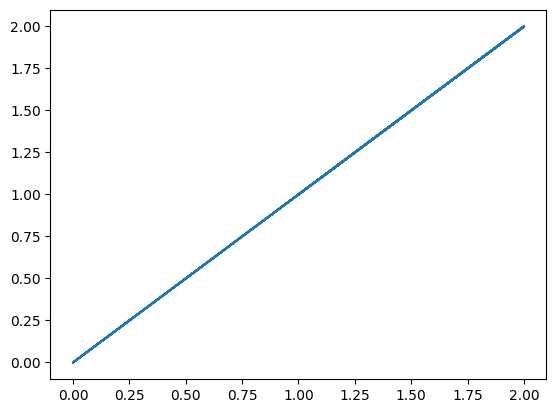

In [32]:
plt.plot(y_pred,y_test)

## custom implementation of KNN for classification

In [38]:
import numpy as np
from collections import Counter
class customKNN:
    def __init__(self,K = 3):
        self.K = K

    def fit(self,X,y):
        self.X_train= np.array(X)
        self.y_train = np.array(y)

    def Euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    def predict(self,X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            distances = [self.Euclidean_dist(x,x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.K]
            k_nearest_label = self.y_train[k_indices]
            most_common = Counter(k_nearest_label).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)
    



    

In [39]:
custknn = customKNN(K =3)

In [42]:

custknn.fit(X_train,y_train)
y_pred1 = custknn.predict(X_test)
y_pred1

array([1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2])

In [41]:
acc1 = accuracy_score(y_pred1,y_test)
acc1

1.0

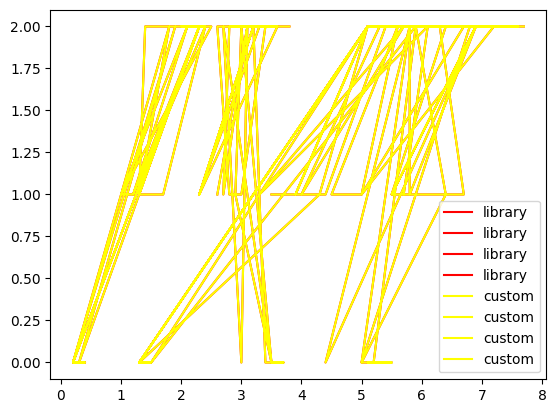

In [49]:
plt.plot(X_test,y_pred,color = "red",label = "library")
plt.plot(X_test,y_pred1,color = "yellow",label = "custom")
plt.legend()
plt.show()

## custom KNN for regression

In [50]:
import numpy as np
from collections import Counter
class customKNN:
    def __init__(self,K = 3):
        self.K = K

    def fit(self,X,y):
        self.X_train= np.array(X)
        self.y_train = np.array(y)

    def Euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    def predict(self,X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            distances = [self.Euclidean_dist(x,x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.K]
            k_nearest_label = self.y_train[k_indices]
            prediction = np.mean(k_nearest_label)
            predictions.append(prediction)

        return np.array(predictions)
    

## apply knn regressor in house price dataset

In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [98]:
data = pd.read_csv('House_Pricing.csv')
# num_df = data.select_dtypes(include = "number")
y = data['Sale Price'] 
num_df = data.select_dtypes(include = "number")
y


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64

['ID',
 'Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']

In [ ]:
def replace_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    lower_bond = q1 - 1.5*iqr
    upper_bond = q3 + 1.5*iqr
    df[column_name] = df[column_name].clip(lower = lower_bond,upper = upper_bond)
    return df[column_name]

    

numeric_columns = data.select_dtypes(include='number').columns.to_list()
numeric_columns.remove('Sale Price')
for col in numeric_columns:
    data[col] = replace_outliers(data,col)



In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

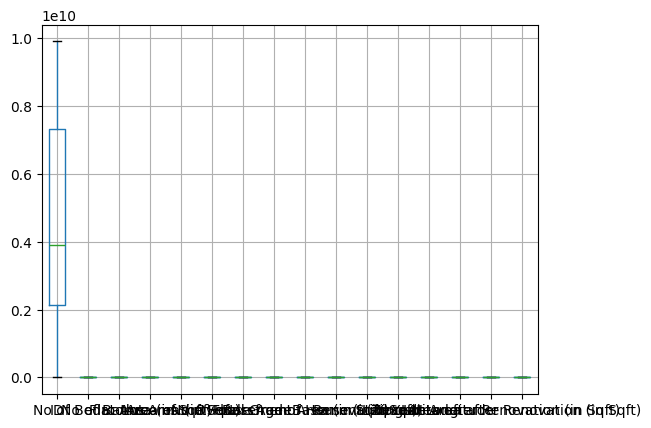

In [79]:
data[numeric_columns].boxplot()

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
data  = data[numeric_columns]
data.head()
data['Renovated Year'] = pd.to_datetime(data['Renovated Year'], errors='coerce').dt.year
data['Renovated Year'] = data['Renovated Year'].fillna(0)

data = data.fillna(data.mean(numeric_only=True))

In [145]:
# full_pipeline = Pipeline(steps = [
#     ('imputer',SimpleImputer(strategy="median")),
#     ('scalar',StandardScaler()),
#     ('knn',KNeighborsRegressor(n_neighbors=3))
# ])
y.fillna(y.median(),inplace=True)

print(y.isna().sum())


X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred2 = knn.predict(X_test)
y_pred2


mse1 = mean_squared_error(y_test,y_pred2)
mse1

0


126052487766.1573

In [141]:
r2  = r2_score(y_test,y_pred2)
r2

0.21969625780030488

In [127]:
from collections import Counter
import numpy as np

class Knnreg:
    def __init__(self,K = 3):
        self.K = K
    def fit(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def euclid(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    def predict(self,X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            distances = [self.euclid(x,x_train) for x_train in self.X_train]
            top_k_indices = np.argsort(distances)[:self.K]
            k_nearest_labels = [self.y_train[top_k_indices]]
            prediction = np.mean(k_nearest_labels)
            predictions.append(prediction)

        return np.array(predictions)

In [131]:
k = Knnreg(K = 3)
k.fit(X_train,y_train)
y_pred3 = k.predict(X_test)


mse2 = mean_squared_error(y_pred3,y_test)

KeyboardInterrupt: 

In [146]:
mse2 = mean_squared_error(y_test,y_pred3)
mse2

247293011599.8457

In [148]:
R2 = r2_score(y_test,y_pred3)
R2

-0.5242634401165396

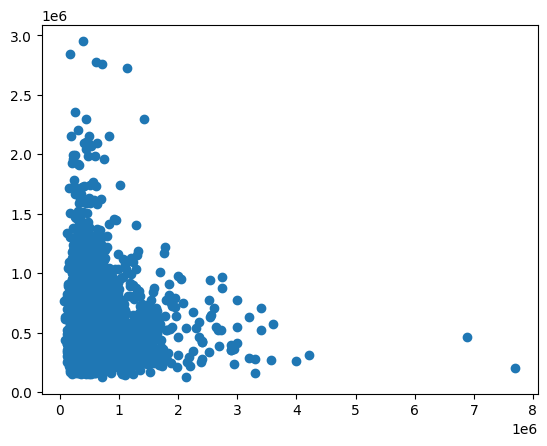

In [150]:
plt.scatter(y_test,y_pred3)

In [156]:
knreg = KNeighborsRegressor(n_neighbors=3)
knreg.fit(X_train,y_train)
y_pred4 = knreg.predict(X_test)
mse3 = mean_squared_error(y_test,y_pred4)
mse3

98602497267.57718

In [157]:
r = r2_score(y_test,y_pred4)
r

0.392234415696474

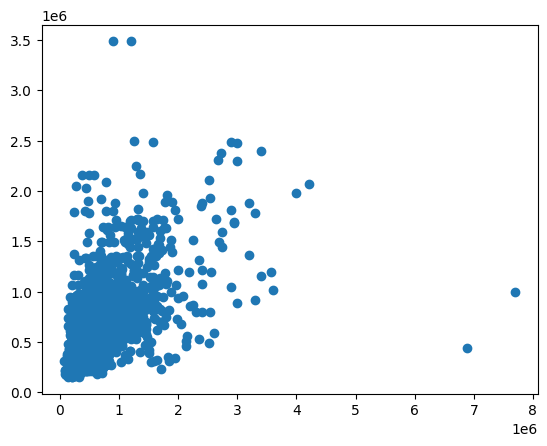

In [158]:
plt.scatter(y_test,y_pred4)

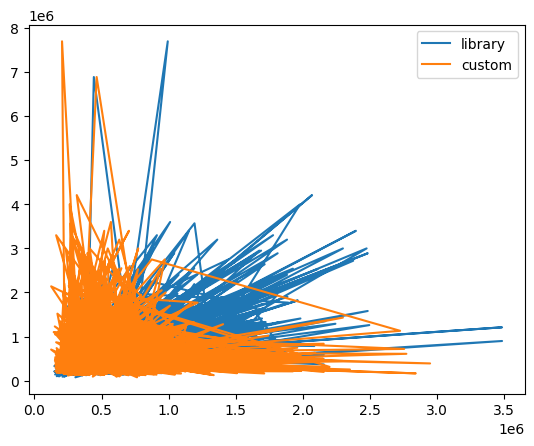

In [159]:
plt.plot(y_pred4,y_test,label = "library")
plt.plot(y_pred3,y_test,label = "custom")
plt.legend()
plt.show()